In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [123]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [124]:
ox=pd.read_csv('o2Saturation.csv')
ox.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [125]:
df['oxygen_saturation']=ox['98.6']

In [126]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,oxygen_saturation
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                303 non-null    int64  
 1   sex                303 non-null    int64  
 2   cp                 303 non-null    int64  
 3   trtbps             303 non-null    int64  
 4   chol               303 non-null    int64  
 5   fbs                303 non-null    int64  
 6   restecg            303 non-null    int64  
 7   thalachh           303 non-null    int64  
 8   exng               303 non-null    int64  
 9   oldpeak            303 non-null    float64
 10  slp                303 non-null    int64  
 11  caa                303 non-null    int64  
 12  thall              303 non-null    int64  
 13  output             303 non-null    int64  
 14  oxygen_saturation  303 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 35.6 KB


# Data Visualization

<AxesSubplot:xlabel='output', ylabel='count'>

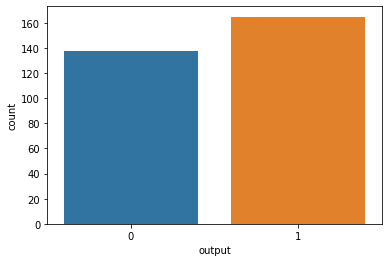

In [128]:
sns.countplot(x='output',data=df)

<AxesSubplot:xlabel='output', ylabel='count'>

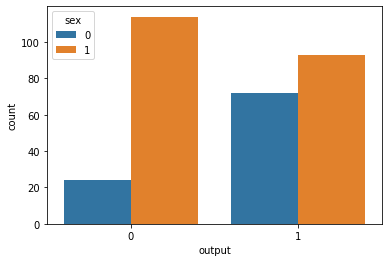

In [129]:
sns.countplot(x='output',hue='sex',data=df)

<AxesSubplot:xlabel='output', ylabel='count'>

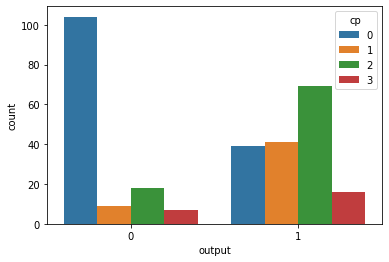

In [130]:
sns.countplot(x='output',hue='cp',data=df)

<AxesSubplot:xlabel='thall', ylabel='count'>

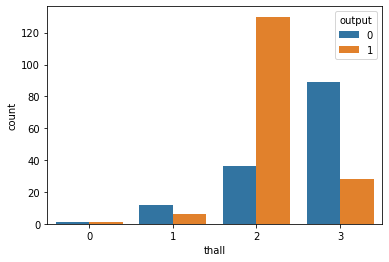

In [131]:
sns.countplot(x='thall',hue='output',data=df)

<AxesSubplot:xlabel='fbs', ylabel='count'>

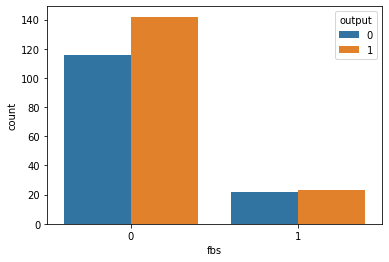

In [132]:
sns.countplot(x='fbs',hue='output',data=df)

<AxesSubplot:xlabel='cp', ylabel='count'>

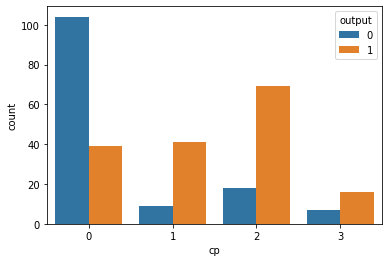

In [133]:
sns.countplot(x='cp',hue='output',data=df)

<AxesSubplot:xlabel='caa', ylabel='count'>

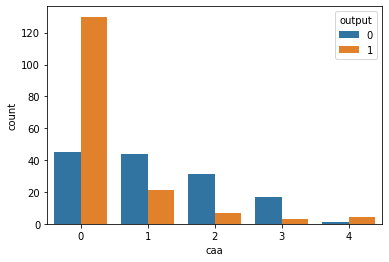

In [134]:
sns.countplot(x='caa',hue='output',data=df)

In [135]:
data=df.groupby(['output','cp']).count()['age'].reset_index()
data

,output,cp,age
0,0,0,104
1,0,1,9
2,0,2,18
3,0,3,7
4,1,0,39
5,1,1,41
6,1,2,69
7,1,3,16


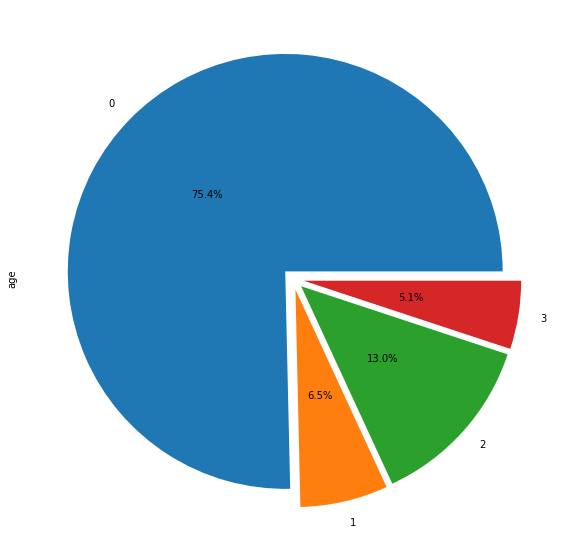

In [136]:
plt.figure(figsize=(10,10))
data[data['output']==0]['age'].plot.pie(autopct="%.1f%%", explode=[0.05]*4, labels=data[data['output']==0]['cp'], pctdistance=0.5)

plt.show()

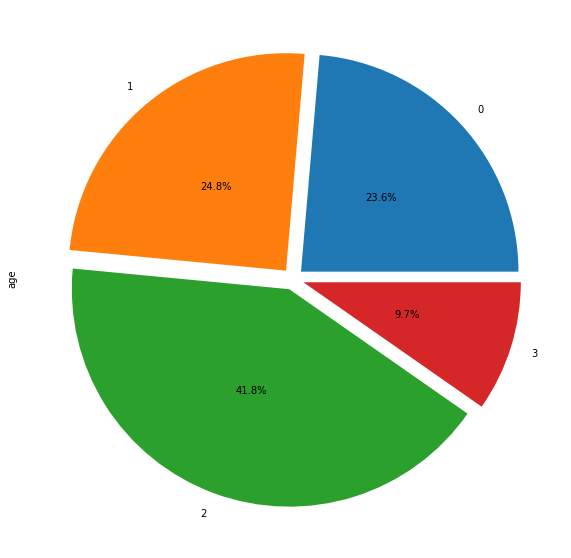

In [137]:
plt.figure(figsize=(10,10))
data[data['output']==1]['age'].plot.pie(autopct="%.1f%%", explode=[0.05]*4, labels=data[data['output']==0]['cp'], pctdistance=0.5);

## Categorical to One Hot 

In [138]:
def to_categorical(df,column_name):
    one_hot_encoder=pd.get_dummies(df[column_name],prefix=column_name,drop_first=True)
    df=df.drop(column_name,axis=1)
    df=df.join(one_hot_encoder)
    return df

In [139]:
df=to_categorical(df,'cp')
df=to_categorical(df,'caa')
df=to_categorical(df,'restecg')
df=to_categorical(df,'slp')
df=to_categorical(df,'thall')



In [140]:
df.head()

,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,output,oxygen_saturation,...,caa_2,caa_3,caa_4,restecg_1,restecg_2,slp_1,slp_2,thall_1,thall_2,thall_3
0,63,1,145,233,1,150,0,2.3,1,98.6,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,98.6,...,0,0,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,98.6,...,0,0,0,0,0,0,1,0,1,0
3,56,1,120,236,0,178,0,0.8,1,98.1,...,0,0,0,1,0,0,1,0,1,0
4,57,0,120,354,0,163,1,0.6,1,97.5,...,0,0,0,1,0,0,1,0,1,0


In [141]:
first_column = df.pop('output')

df.insert(0, 'output', first_column)

<AxesSubplot:>

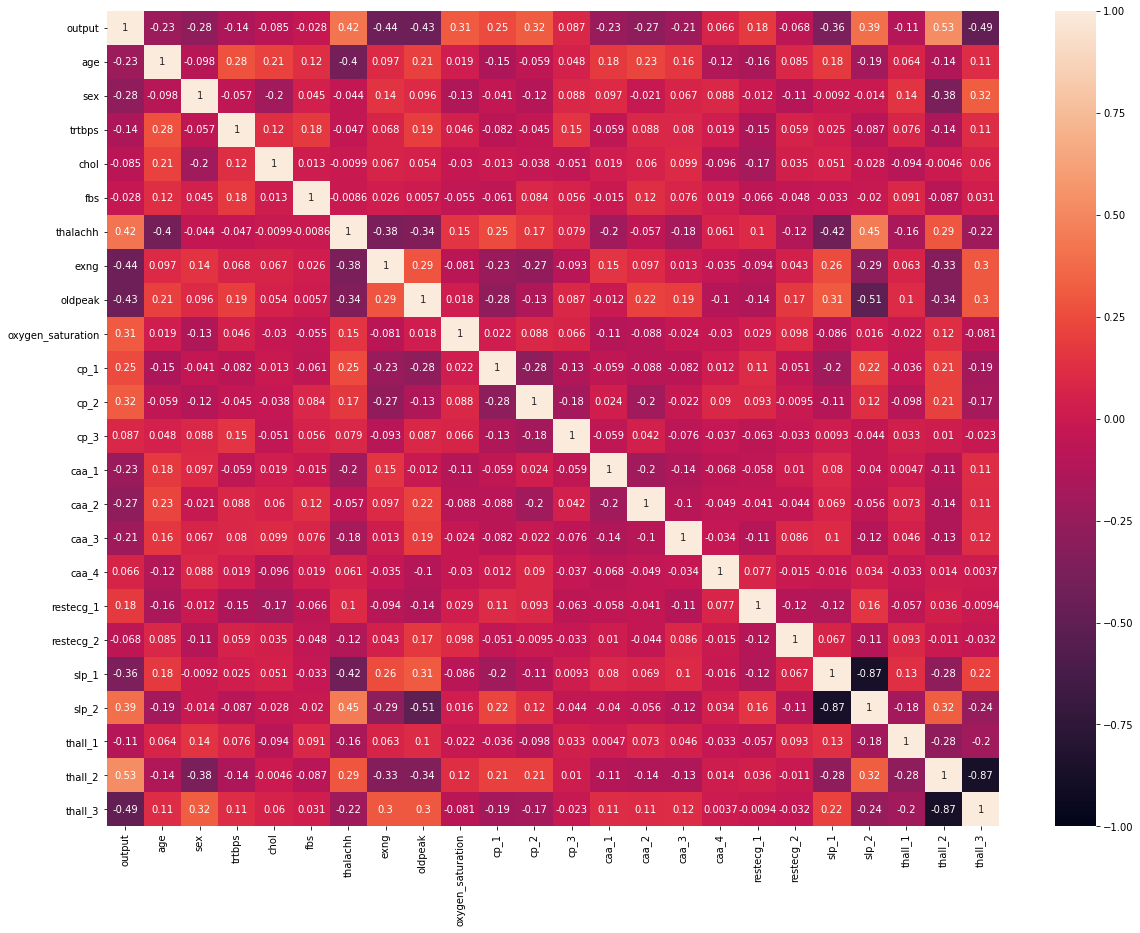

In [142]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)

In [143]:
if df.duplicated().sum():
    df.drop_duplicates(inplace=True)

In [144]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['output'], axis=1).values.astype(float)

scale = StandardScaler()
X = scale.fit_transform(X)

Y = df['output'].values

In [170]:
# Logistic is best
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

# from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=41)
rf = RandomForestClassifier()
sv = svm.SVC(kernel='rbf')
dt=DecisionTreeClassifier()
lr=LogisticRegression()
knn=KNeighborsClassifier()
for name,model in zip(['RF','SVM','DT','LR','KNN'],[rf,sv,dt,lr,knn]):
    Model=model.fit(X_train,y_train)
    pred = Model.predict(X_test)
#     print(metrics.classification_report(y_test,pred))
    print(name,' : ',metrics.accuracy_score(y_test,pred))
#     print(metrics.f1_score(y_test,pred))

RF  :  0.8351648351648352
SVM  :  0.8681318681318682
DT  :  0.7802197802197802
LR  :  0.8901098901098901
KNN  :  0.8461538461538461
